In [1]:
# Import pandas
import pandas as pd
import numpy as np

# Load the xlsx file
df = pd.read_csv('C1Trace00010.csv')
df.head(10)

C:\Users\Usuario\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (0,1,2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,LECROYWS422,12316,Waveform
Segments,1,SegmentSize,200001.0
Segment,TrigTime,TimeSinceSegment1,NaN
#1,06-May-2022 18:43:40,0,NaN
Time,Ampl,NaN,NaN
-10,-0.0125,NaN,NaN
-9.9999,-0.0125,NaN,NaN
-9.9998,-0.075,NaN,NaN
-9.9997,-0.075,NaN,NaN
-9.9996,-0.2625,NaN,NaN
-9.9995,-0.2625,NaN,NaN


In [2]:
# Get the time data as a column
df.reset_index(inplace=True)
df

,index,LECROYWS422,12316,Waveform
0,Segments,1,SegmentSize,200001.0
1,Segment,TrigTime,TimeSinceSegment1,NaN
2,#1,06-May-2022 18:43:40,0,NaN
3,Time,Ampl,NaN,NaN
4,-10,-0.0125,NaN,NaN
...,...,...,...,...
200000,9.9996,-0.1375,NaN,NaN
200001,9.9997,-0.1375,NaN,NaN
200002,9.9998,-0.075,NaN,NaN
200003,9.9999,-0.325,NaN,NaN


In [3]:
# Get rid of unwanted columns 
df = df.iloc[4:,]
df = df.drop(['Waveform', '12316'], axis=1)

In [4]:
df['index'] = pd.to_numeric(df['index'],errors='coerce')
df['LECROYWS422'] = pd.to_numeric(df['LECROYWS422'],errors='coerce')
df

,index,LECROYWS422
4,-10.0000,-0.0125
5,-9.9999,-0.0125
6,-9.9998,-0.0750
7,-9.9997,-0.0750
8,-9.9996,-0.2625
...,...,...
200000,9.9996,-0.1375
200001,9.9997,-0.1375
200002,9.9998,-0.0750
200003,9.9999,-0.3250


In [5]:
# Define time data
time = df.iloc[:,0]

In [6]:
# Define amplitude data
amp = df['LECROYWS422']

<IPython.core.display.Javascript object>


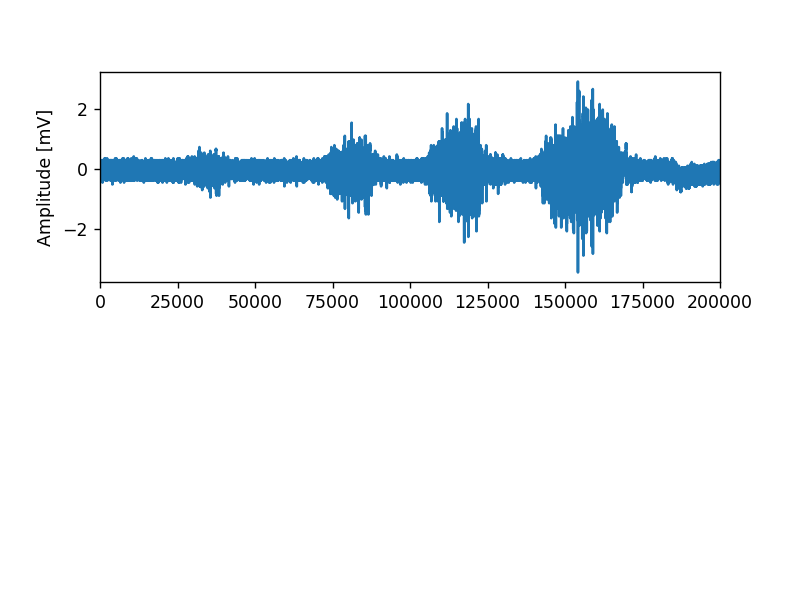

Text(0, 0.5, 'Amplitude [mV]')

In [7]:
import matplotlib.pyplot as plt
%matplotlib notebook

# Plot the signal
plt.figure()
plt.subplot(211)
plt.plot(amp)
plt.xlim((0,200000))
plt.ylabel('Amplitude [mV]')

<IPython.core.display.Javascript object>


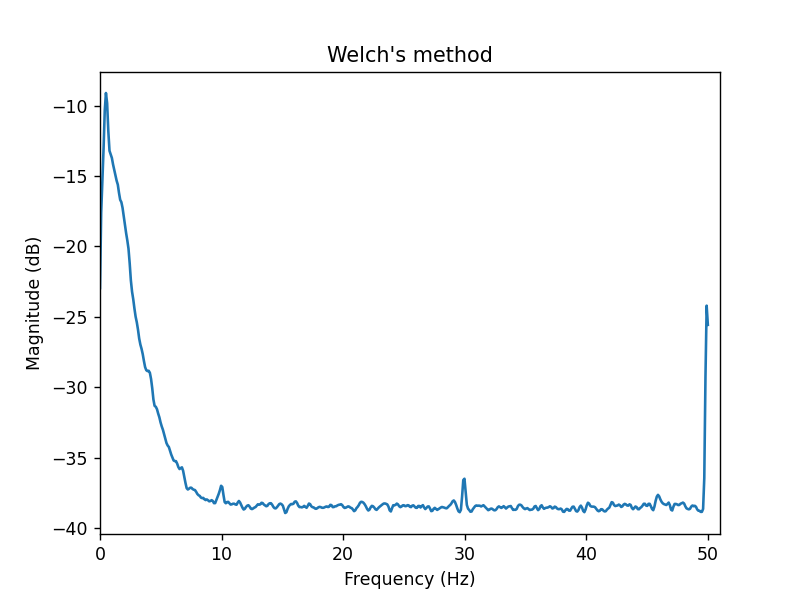

Text(0.5, 1.0, "Welch's method")

In [8]:
import scipy.signal as signal

# Plpt the periodogram
fs = 100
x_emg = amp
f_welch_emg, Px_welch_emg = signal.welch(x_emg, fs=fs, window='hamming', nperseg=512, nfft=1024)

plt.figure()
plt.plot(f_welch_emg, 10*np.log10(Px_welch_emg))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')
plt.xlim((0,51))
plt.title('Welch\'s method')

In [9]:
f0 = 50.0     # Frequency to be removed from the signal (Hz)
Q = 50.0    # Quality factor

# Create and apply the notch filter
b_notch, a_notch = signal.iirnotch(f0,Q,100)
emg_notch = signal.filtfilt(b_notch, a_notch, amp)

<IPython.core.display.Javascript object>


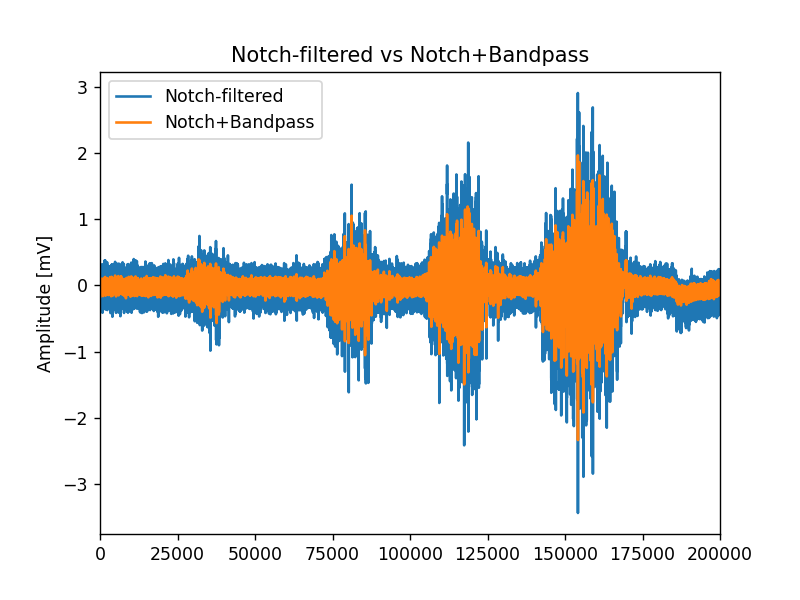

Text(0.5, 1.0, 'Notch-filtered vs Notch+Bandpass')

In [10]:
# Design the band-pass filter
f_low = 0.5 # Low cutoff frequency
f_high = 8 # High cutoff frequency
numtaps = 64

b_bp=signal.firwin(numtaps, [f_low, f_high], pass_zero=False, fs=fs)

emg_nt_bandpass = signal.filtfilt(b_bp, 1, emg_notch) # Apply filter to notch-filtered signal
emg_orig_bandpass = signal.filtfilt(b_bp, 1, amp) # Apply filter to original signal

plt.figure()
plt.plot(emg_notch)
plt.plot(emg_nt_bandpass)
plt.xlim((0,200000))
plt.ylabel('Amplitude [mV]')
plt.legend(('Notch-filtered','Notch+Bandpass'))
plt.title('Notch-filtered vs Notch+Bandpass')

<IPython.core.display.Javascript object>


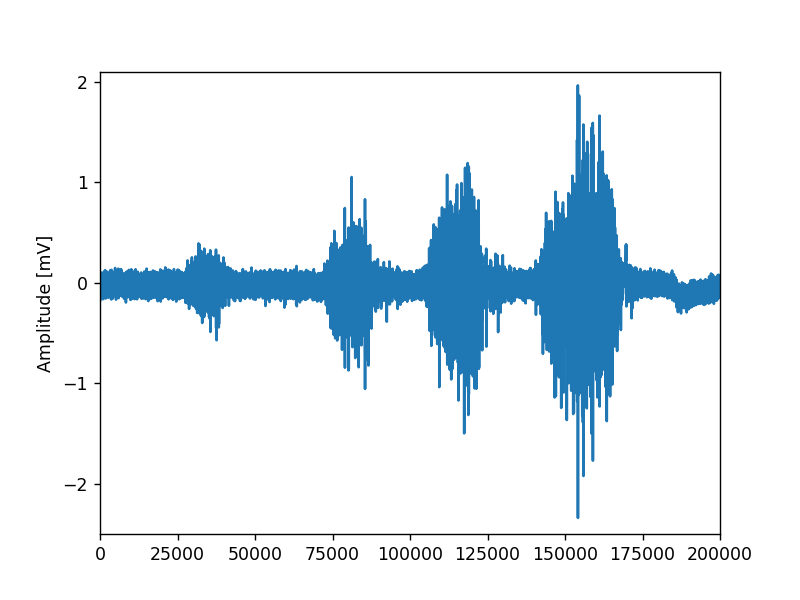

(-2.5, 2.1)

In [11]:
# Plot the final signal
plt.figure()
plt.plot(emg_orig_bandpass)
plt.ylabel('Amplitude [mV]')
plt.xlim((0,200000))
plt.ylim((-2.5,2.1))